# Aggregate Interlock

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
sp.init_printing()

## Walraven's Approach
By using regression analysis, simplified equations fitting the experimental results have been derived by Walraven. The curves of aggregate interloack which mostly fit the experimental curves are:
\begin{equation}
\tau_{ai} = -\frac{f_{c}}{30} + \left( 1.8 w^{-0.8} + (0.234 w^{-0.707} - 0.2) f_{c}\right) \delta \geq 0 \\ 
\sigma_{ai} = -\frac{f_{c}}{20} + \left( 1.35 w^{-0.63} + (0.191 w^{-0.552} - 0.15) f_{c}\right) \delta \geq 0
\end{equation}

In [2]:
f_ct =sp.Symbol('f_ct', nonnegative = True)
w = sp.Symbol('w', nonnegative = True)
delta = sp.Symbol(r'\delta', nonnegative = True)

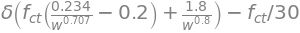

In [3]:
tau_ai = - f_ct/30 + (1.8*w**(-0.8) +(0.234*w**(-0.707) - 0.2) * f_ct)*delta
tau_ai

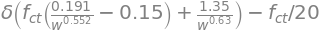

In [4]:
sigma_ai = - f_ct/20 + (1.35*w**(-0.63) +(0.191*w**(-0.552) - 0.15) * f_ct)*delta
sigma_ai

In [5]:
f_ct_ = 35
get_sigma_ai = sp.lambdify((w, delta), sigma_ai.subs(f_ct, f_ct_), 'numpy')
get_sigma_ai

<function _lambdifygenerated(w, Dummy_22)>

In [6]:
get_tau_ai = sp.lambdify((w, delta), tau_ai.subs(f_ct, f_ct_), 'numpy')
get_tau_ai

<function _lambdifygenerated(w, Dummy_23)>

## Plotting $\tau$

In [9]:
w_ = np.linspace(-1, 1, 3)
tau_ai = np.zeros((100,3))
for i, w in enumerate(w_):
    delta_ = np.linspace(0, 2, 100)
    for j, delta in enumerate(delta_):
        tau_ai[j,i] = get_tau_ai(w, delta)
#print(tau_ai);

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in double_scalars
  return (Dummy_23*(1.8*w**(-0.8) + 8.19*w**(-0.707) - 7.0) - 7/6)
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (Dummy_23*(1.8*w**(-0.8) + 8.19*w**(-0.707) - 7.0) - 7/6)


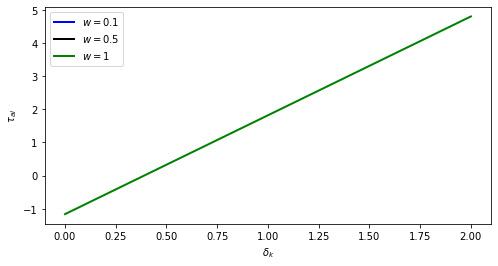

In [10]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(delta_, tau_ai[:,0], color='blue', lw=2, label = (r'$w = 0.1$'))
ax1.plot(delta_, tau_ai[:,1], color='black', lw=2, label = (r'$w = 0.5$'))
ax1.plot(delta_, tau_ai[:,2], color='green', lw=2, label = (r'$w = 1$'))
ax1.set_xlabel(r'$\delta_k$'); ax1.set_ylabel(r'$\tau_{ai}$')
ax1.legend()

## Plotting $\sigma$

In [ ]:
w_ = np.linspace(0.1, 1, 3)
sigma_ai = np.zeros((100,3))
for i, w in enumerate(w_):
    delta_ = np.linspace(0.1, 2, 100)
    for j, delta in enumerate(delta_):
        sigma_ai[j,i] = get_sigma_ai(w, delta)
#print(sigma_ai);

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(delta_, sigma_ai[:,0], color='blue', lw=2, label = (r'$w = 0.1 $'))
ax1.plot(delta_, sigma_ai[:,1], color='black', lw=2, label = (r'$w = 0.5$'))
ax1.plot(delta_, sigma_ai[:,2], color='green', lw=2, label = (r'$w = 1$'))
ax1.set_xlabel(r'$\delta_k$'); ax1.set_ylabel(r'$\sigma_{ai}$')
ax1.legend()

## Bazant's Approach refined by Gambarova
The Rough Crack Model proposed by Bazant was later refined by Gambarova in which he modified the relationship between normal stresses $\sigma_{ag}$ and crack kinematics (w and s). He further stated that the aggregate size $d_g$ plays a greater role in transferring shear. The stress can be transferred according to the following equations:
\begin{equation}
\sigma_{ag} = -0.62 \sqrt{w} \frac{r}{(1 + r^2)^{0.25}} \tau_{ag} \\
\tau_{ag} = \tau_0 \left( 1 - \sqrt{\frac{2 w}{d_g}}\right) r \frac{a_3 + a_4 \|r\|^3}{1 + a_4 r^4}
\end{equation}
where,
\begin{equation}
r = \frac{s}{w} \\
\tau_0 = 0.25 f_c \\
a_3 = \frac{2.45}{\tau_0} \\
a_4 = 2.44 \left( 1 - \frac{4}{\tau_0}\right)
\end{equation}

In [ ]:
w = sp.Symbol('w', nonnegative = True)
s = sp.Symbol('s', nonnegative = True)
f_c = sp.Symbol('f_c', nonnegative = True)
d_g  = sp.Symbol('d_g', nonnegative = True)

In [ ]:
r = s/w
r

In [ ]:
tau_0 = 0.25 * f_c
tau_0

In [ ]:
a_3  =  2.45/tau_0
a_3

In [ ]:
a_4  = 2.44 * (1 - (4/tau_0))
a_4

In [ ]:
#r = sp.Symbol('r', nonnegative = True)
#a_3 = sp.Symbol('a_3', nonnegative = True)
#a_4 = sp.Symbol('a_4',nonnegative = True)
#tau_0 = sp.Symbol(r'\tau_0',nonnegative = True)
tau_ag = tau_0 * (1 - sp.sqrt((2 * w)/d_g)) * r * (a_3 + (a_4 * sp.Abs(r)**3)) / (1 + (a_4 *r**4))
tau_ag

In [ ]:
sigma_ag = -0.62 * sp.sqrt(w) * (r)/(1 + r**2)**0.25 * tau_ag
sigma_ag

In [ ]:
params = {
    f_c : 35,
    d_g : 22
}

In [ ]:
get_tau_ag = sp.lambdify((w, s), tau_ag.subs(params), 'numpy')
tau_ag.subs(params)

In [ ]:
get_sigma_ag = sp.lambdify((w, s), sigma_ag.subs(params), 'numpy')
get_sigma_ag

## Plotting $\tau$

In [ ]:
w_ = np.linspace(0.1, 1, 3)
tau_ag = np.zeros((100,3))
for i, w in enumerate(w_):
    s_ = np.linspace(0, 2, 100)
    for j, s in enumerate(s_):
        tau_ag[j,i] = get_tau_ag(w, s)
#print(tau_ag);

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(s_, tau_ag[:,0], color='blue', lw=2, label = (r'$w = 0.1$'))
ax1.plot(s_, tau_ag[:,1], color='black', lw=2, label = (r'$w = 0.5$'))
ax1.plot(s_, tau_ag[:,2], color='green', lw=2, label = (r'$w = 1$'))
ax1.set_xlabel(r'$s$'); ax1.set_ylabel(r'$\tau_{ag}$')
ax1.legend()

## Plotting $\sigma$

In [ ]:
w_ = np.linspace(0.1, 1, 3)
sigma_ag = np.zeros((100,3))
for i, w in enumerate(w_):
    s_ = np.linspace(0, 2, 100)
    for j, s in enumerate(s_):
        sigma_ag[j,i] = get_sigma_ag(w, s)
#print(sigma_ag)

In [ ]:
_, (ax1) = plt.subplots(1, 1, figsize=(8,4))
ax1.plot(s_, sigma_ag[:,0], color='blue', lw=2, label = (r'$w = 0.1$'))
ax1.plot(s_, sigma_ag[:,1], color='black', lw=2, label = (r'$w = 0.5$'))
ax1.plot(s_, sigma_ag[:,2], color='green', lw=2, label = (r'$w = 1$'))
ax1.set_xlabel(r'$s$'); ax1.set_ylabel(r'$\sigma_{ag}$')
ax1.legend()